In [87]:
import pandas as pd #used for working with dataframes—our dataset
import numpy as np #used to manipulate arrays
import matplotlib.pyplot as plt #for making visuals
import seaborn as sns #for making visuals too
import json

In [88]:
#credits=pd.read_csv(r"C:\Users\melinadiaz\Documents\GitHub\credits.csv", error_bad_lines = False)
movies=pd.read_csv(r"C:\Users\melinadiaz\Documents\GitHub\movies.csv")
bechdel=pd.read_json(r"C:\Users\melinadiaz\Documents\GitHub\Bechdel-master_imdb_data.json")

In [89]:
print(bechdel.columns)
bechdel.sort_values("imdbID")

Index(['Plot', 'Rated', 'Response', 'Language', 'Title', 'Country', 'Writer',
       'Metascore', 'imdbRating', 'Director', 'Released', 'Actors', 'Year',
       'Genre', 'Awards', 'Runtime', 'Type', 'Poster', 'imdbVotes', 'imdbID',
       'Error'],
      dtype='object')


,Plot,Rated,Response,Language,Title,Country,Writer,Metascore,imdbRating,Director,...,Actors,Year,Genre,Awards,Runtime,Type,Poster,imdbVotes,imdbID,Error
1670,The leader of a marching band demonstrates an ...,N/A,True,French,The Music Lover,France,N/A,N/A,7.0,Georges Méliès,...,Georges Méliès,1903,"Short, Comedy, Music",N/A,3 min,movie,http://ia.media-imdb.com/images/M/MV5BNzMxODQ2...,881,tt0000455,NaN
4921,True story of notorious Australian outlaw Ned ...,N/A,True,N/A,The Story of the Kelly Gang,Australia,Charles Tait,N/A,6.4,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",1906,"Biography, Crime, Drama",N/A,70 min,movie,N/A,213,tt0000574,NaN
1299,"A smoker falls asleep, and two mischievious fa...",Unrated,True,English,"Princess Nicotine; or, The Smoke Fairy",USA,N/A,N/A,6.7,J. Stuart Blackton,...,"Paul Panzer, Gladys Hulette",1909,"Comedy, Short, Fantasy",1 win.,5 min,movie,N/A,550,tt0001009,NaN
1593,The fabled queen of Egypt's affair with Roman ...,Unrated,True,English,Cleopatra,USA,Victorien Sardou (adapted from the play by),N/A,5.2,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",1912,"Drama, History",N/A,88 min,movie,N/A,269,tt0002101,NaN
1268,The U.S. Army and the Indians sign a peace tre...,Not Rated,True,English,The Invaders,USA,N/A,N/A,6.2,"Francis Ford, Thomas H. Ince",...,"Francis Ford, Ethel Grandin, Ann Little, Ray M...",1912,"Short, Western",N/A,41 min,movie,http://ia.media-imdb.com/images/M/MV5BMTI4NDU2...,176,tt0002281,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,"The Pa Boys is an energetic, uplifting road mo...",N/A,True,English,The Pa Boys,New Zealand,Himiona Grace,N/A,7.3,Himiona Grace,...,"Francis Kora, Matariki Whatarau, Tola Newbery,...",2014,"Drama, Music",N/A,93 min,movie,http://ia.media-imdb.com/images/M/MV5BMTYzNzM4...,14,tt3515892,NaN
1958,N/A,N/A,True,English,Our RoboCop Remake,USA,N/A,N/A,7.5,"Kate Freund, Matthew Freund, Hank Friedmann, A...",...,"Chase Fein, Nichole Bagby, Willy Roberts, Hank...",2014,"Animation, Action, Comedy",N/A,108 min,movie,N/A,33,tt3528906,NaN
121,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incorrect IMDb ID
1173,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incorrect IMDb ID


In [90]:
print(movies.columns)


Index(['year', 'imdb', 'title', 'test', 'clean_test', 'binary', 'budget',
       'domgross', 'intgross', 'code', 'budget_2013$', 'domgross_2013$',
       'intgross_2013$', 'period code', 'decade code'],
      dtype='object')


In [91]:
movies = movies.rename(columns={'imdb': 'imdbID'})
merge=pd.merge(movies, bechdel, on='imdbID')
merge.sort_values("imdbID")
print(merge.columns)
merge=merge[['year', 'imdbID', 'title', "binary", 'budget',
       'domgross', 'intgross', 'budget_2013$', 'domgross_2013$',
       'intgross_2013$', 'Plot', 'Rated', 'Country', 'Writer', 'Metascore',
       'imdbRating', 'Director', 'Actors', 'Genre',
       'Awards', 'Runtime', 'Type', 'imdbVotes']]
merge=merge[merge["Type"]=="movie"]
merge=merge[['year', 'imdbID', 'title', "binary", 'budget',
       'domgross', 'intgross', 'budget_2013$', 'domgross_2013$',
       'intgross_2013$', 'Plot', 'Country', 'Writer', 'Metascore',
       'imdbRating', 'Director', 'Actors', 'Genre',
       'Awards', 'Runtime', 'Rated','imdbVotes']]
merge

Index(['year', 'imdbID', 'title', 'test', 'clean_test', 'binary', 'budget',
       'domgross', 'intgross', 'code', 'budget_2013$', 'domgross_2013$',
       'intgross_2013$', 'period code', 'decade code', 'Plot', 'Rated',
       'Response', 'Language', 'Title', 'Country', 'Writer', 'Metascore',
       'imdbRating', 'Director', 'Released', 'Actors', 'Year', 'Genre',
       'Awards', 'Runtime', 'Type', 'Poster', 'imdbVotes', 'Error'],
      dtype='object')


,year,imdbID,title,binary,budget,domgross,intgross,budget_2013$,domgross_2013$,intgross_2013$,...,Writer,Metascore,imdbRating,Director,Actors,Genre,Awards,Runtime,Rated,imdbVotes
0,2013,tt1711425,21 &amp; Over,FAIL,13000000,25682380.0,42195766.0,13000000,25682380.0,42195766.0,...,"Jon Lucas, Scott Moore",34,5.8,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",Comedy,1 win.,93 min,R,"40,030"
1,2012,tt1343727,Dredd 3D,PASS,45000000,13414714.0,40868994.0,45658735,13611086.0,41467257.0,...,"John Wagner (characters), Carlos Ezquerra (cha...",59,7.0,Pete Travis,"Karl Urban, Rachel Wood, Andile Mngadi, Porteu...","Action, Crime, Sci-Fi",2 wins & 8 nominations.,95 min,R,"149,225"
2,2013,tt2024544,12 Years a Slave,FAIL,20000000,53107035.0,158607035.0,20000000,53107035.0,158607035.0,...,"John Ridley (screenplay), Solomon Northup (bas...",97,8.3,Steve McQueen,"Chiwetel Ejiofor, Dwight Henry, Dickie Gravois...","Biography, Drama, History",Won 3 Oscars. Another 131 wins & 137 nominations.,134 min,R,"143,446"
3,2013,tt1272878,2 Guns,FAIL,61000000,75612460.0,132493015.0,61000000,75612460.0,132493015.0,...,"Blake Masters (screenplay), Steven Grant (base...",55,6.8,Baltasar Kormákur,"Denzel Washington, Mark Wahlberg, Paula Patton...","Action, Comedy, Crime",1 win.,109 min,R,"87,301"
4,2013,tt0453562,42,FAIL,40000000,95020213.0,95020213.0,40000000,95020213.0,95020213.0,...,Brian Helgeland,62,7.6,Brian Helgeland,"Chadwick Boseman, Harrison Ford, Nicole Behari...","Biography, Drama, Sport",3 wins & 13 nominations.,128 min,PG-13,"43,608"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,1971,tt0067741,Shaft,FAIL,53012938,70327868.0,107190108.0,305063707,404702718.0,616827003.0,...,"Ernest Tidyman (screenplay), John D.F. Black (...",N/A,6.6,Gordon Parks,"Richard Roundtree, Moses Gunn, Charles Cioffi,...","Action, Crime, Thriller",Won 1 Oscar. Another 4 wins & 4 nominations.,100 min,R,"10,275"
1788,1971,tt0067800,Straw Dogs,FAIL,25000000,10324441.0,11253821.0,143862856,59412143.0,64760273.0,...,"David Zelag Goodman (screenplay), Sam Peckinpa...",N/A,7.6,Sam Peckinpah,"Dustin Hoffman, Susan George, Peter Vaughan, T...",Thriller,Nominated for 1 Oscar. Another 1 win.,118 min,R,"37,726"
1789,1971,tt0067116,The French Connection,FAIL,2200000,41158757.0,41158757.0,12659931,236848653.0,236848653.0,...,"Ernest Tidyman (screenplay), Robin Moore (base...",96,7.8,William Friedkin,"Gene Hackman, Fernando Rey, Roy Scheider, Tony...","Action, Crime, Thriller",Won 5 Oscars. Another 18 wins & 8 nominations.,104 min,R,"62,153"
1790,1971,tt0067992,Willy Wonka &amp; the Chocolate Factory,FAIL,3000000,4000000.0,4000000.0,17263543,23018057.0,23018057.0,...,"Roald Dahl (screenplay), Roald Dahl (book)",N/A,7.8,Mel Stuart,"Gene Wilder, Jack Albertson, Peter Ostrum, Roy...","Fantasy, Musical",Nominated for 1 Oscar. Another 1 nomination.,100 min,G,"93,466"


In [350]:
pas=merge[merge["Bechdel Rating"]=="PASS"]
pas
fail=merge[merge["Bechdel Rating"]=="FAIL"]
fail

,year,imdbID,title,Bechdel Rating,budget,domgross,intgross,budget_2013$,domgross_2013$,intgross_2013$,...,Writer,Metascore,imdbRating,Director,Actors,Genre,Awards,Runtime,Rated,imdbVotes
0,2013,tt1711425,21 &amp; Over,FAIL,13000000,25682380.0,42195766.0,13000000,25682380.0,42195766.0,...,"Jon Lucas, Scott Moore",34,5.8,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",Comedy,1 win.,93 min,R,"40,030"
2,2013,tt2024544,12 Years a Slave,FAIL,20000000,53107035.0,158607035.0,20000000,53107035.0,158607035.0,...,"John Ridley (screenplay), Solomon Northup (bas...",97,8.3,Steve McQueen,"Chiwetel Ejiofor, Dwight Henry, Dickie Gravois...","Biography, Drama, History",Won 3 Oscars. Another 131 wins & 137 nominations.,134 min,R,"143,446"
3,2013,tt1272878,2 Guns,FAIL,61000000,75612460.0,132493015.0,61000000,75612460.0,132493015.0,...,"Blake Masters (screenplay), Steven Grant (base...",55,6.8,Baltasar Kormákur,"Denzel Washington, Mark Wahlberg, Paula Patton...","Action, Comedy, Crime",1 win.,109 min,R,"87,301"
4,2013,tt0453562,42,FAIL,40000000,95020213.0,95020213.0,40000000,95020213.0,95020213.0,...,Brian Helgeland,62,7.6,Brian Helgeland,"Chadwick Boseman, Harrison Ford, Nicole Behari...","Biography, Drama, Sport",3 wins & 13 nominations.,128 min,PG-13,"43,608"
5,2013,tt1335975,47 Ronin,FAIL,225000000,38362475.0,145803842.0,225000000,38362475.0,145803842.0,...,"Chris Morgan (screenplay), Hossein Amini (scre...",29,6.6,Carl Rinsch,"Keanu Reeves, Hiroyuki Sanada, Ko Shibasaki, T...","Action, Adventure, Fantasy",1 nomination.,118 min,PG-13,"25,735"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,1971,tt0067065,Escape from the Planet of the Apes,FAIL,2500000,12300000.0,12300000.0,14386286,70780525.0,70780525.0,...,"Paul Dehn, Pierre Boulle (characters creator)",N/A,6.2,Don Taylor,"Roddy McDowall, Kim Hunter, Bradford Dillman, ...","Action, Sci-Fi",N/A,98 min,G,"16,126"
1787,1971,tt0067741,Shaft,FAIL,53012938,70327868.0,107190108.0,305063707,404702718.0,616827003.0,...,"Ernest Tidyman (screenplay), John D.F. Black (...",N/A,6.6,Gordon Parks,"Richard Roundtree, Moses Gunn, Charles Cioffi,...","Action, Crime, Thriller",Won 1 Oscar. Another 4 wins & 4 nominations.,100 min,R,"10,275"
1788,1971,tt0067800,Straw Dogs,FAIL,25000000,10324441.0,11253821.0,143862856,59412143.0,64760273.0,...,"David Zelag Goodman (screenplay), Sam Peckinpa...",N/A,7.6,Sam Peckinpah,"Dustin Hoffman, Susan George, Peter Vaughan, T...",Thriller,Nominated for 1 Oscar. Another 1 win.,118 min,R,"37,726"
1789,1971,tt0067116,The French Connection,FAIL,2200000,41158757.0,41158757.0,12659931,236848653.0,236848653.0,...,"Ernest Tidyman (screenplay), Robin Moore (base...",96,7.8,William Friedkin,"Gene Hackman, Fernando Rey, Roy Scheider, Tony...","Action, Crime, Thriller",Won 5 Oscars. Another 18 wins & 8 nominations.,104 min,R,"62,153"


In [93]:
year_counts=merge.groupby("binary")["year"].value_counts()
print(year_counts.sort_index(ascending=False))
year_counts=pd.DataFrame(year_counts)
year_counts.columns=["count"]
pass_counts=year_counts.loc["PASS"]
pass_counts["PASS"]="1"
pass_counts.sort_values(by="year", ascending=False)

binary  year
PASS    2013    46
        2012    36
        2011    53
        2010    61
        2009    42
                ..
FAIL    1975     5
        1974     5
        1973     4
        1972     2
        1971     5
Name: year, Length: 85, dtype: int64


,count,PASS
year,,
2013,46,1
2012,36,1
2011,53,1
2010,61,1
2009,42,1
2008,50,1
2007,41,1
2006,43,1
2005,54,1


In [94]:
fail_counts=year_counts.loc["FAIL"]
fail_counts["PASS"]="0"
fail

,year,imdbID,title,binary,budget,domgross,intgross,budget_2013$,domgross_2013$,intgross_2013$,...,Writer,Metascore,imdbRating,Director,Actors,Genre,Awards,Runtime,Rated,imdbVotes
0,2013,tt1711425,21 &amp; Over,FAIL,13000000,25682380.0,42195766.0,13000000,25682380.0,42195766.0,...,"Jon Lucas, Scott Moore",34,5.8,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",Comedy,1 win.,93 min,R,"40,030"
2,2013,tt2024544,12 Years a Slave,FAIL,20000000,53107035.0,158607035.0,20000000,53107035.0,158607035.0,...,"John Ridley (screenplay), Solomon Northup (bas...",97,8.3,Steve McQueen,"Chiwetel Ejiofor, Dwight Henry, Dickie Gravois...","Biography, Drama, History",Won 3 Oscars. Another 131 wins & 137 nominations.,134 min,R,"143,446"
3,2013,tt1272878,2 Guns,FAIL,61000000,75612460.0,132493015.0,61000000,75612460.0,132493015.0,...,"Blake Masters (screenplay), Steven Grant (base...",55,6.8,Baltasar Kormákur,"Denzel Washington, Mark Wahlberg, Paula Patton...","Action, Comedy, Crime",1 win.,109 min,R,"87,301"
4,2013,tt0453562,42,FAIL,40000000,95020213.0,95020213.0,40000000,95020213.0,95020213.0,...,Brian Helgeland,62,7.6,Brian Helgeland,"Chadwick Boseman, Harrison Ford, Nicole Behari...","Biography, Drama, Sport",3 wins & 13 nominations.,128 min,PG-13,"43,608"
5,2013,tt1335975,47 Ronin,FAIL,225000000,38362475.0,145803842.0,225000000,38362475.0,145803842.0,...,"Chris Morgan (screenplay), Hossein Amini (scre...",29,6.6,Carl Rinsch,"Keanu Reeves, Hiroyuki Sanada, Ko Shibasaki, T...","Action, Adventure, Fantasy",1 nomination.,118 min,PG-13,"25,735"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,1971,tt0067065,Escape from the Planet of the Apes,FAIL,2500000,12300000.0,12300000.0,14386286,70780525.0,70780525.0,...,"Paul Dehn, Pierre Boulle (characters creator)",N/A,6.2,Don Taylor,"Roddy McDowall, Kim Hunter, Bradford Dillman, ...","Action, Sci-Fi",N/A,98 min,G,"16,126"
1787,1971,tt0067741,Shaft,FAIL,53012938,70327868.0,107190108.0,305063707,404702718.0,616827003.0,...,"Ernest Tidyman (screenplay), John D.F. Black (...",N/A,6.6,Gordon Parks,"Richard Roundtree, Moses Gunn, Charles Cioffi,...","Action, Crime, Thriller",Won 1 Oscar. Another 4 wins & 4 nominations.,100 min,R,"10,275"
1788,1971,tt0067800,Straw Dogs,FAIL,25000000,10324441.0,11253821.0,143862856,59412143.0,64760273.0,...,"David Zelag Goodman (screenplay), Sam Peckinpa...",N/A,7.6,Sam Peckinpah,"Dustin Hoffman, Susan George, Peter Vaughan, T...",Thriller,Nominated for 1 Oscar. Another 1 win.,118 min,R,"37,726"
1789,1971,tt0067116,The French Connection,FAIL,2200000,41158757.0,41158757.0,12659931,236848653.0,236848653.0,...,"Ernest Tidyman (screenplay), Robin Moore (base...",96,7.8,William Friedkin,"Gene Hackman, Fernando Rey, Roy Scheider, Tony...","Action, Crime, Thriller",Won 5 Oscars. Another 18 wins & 8 nominations.,104 min,R,"62,153"


I kept getting an error where it would say pass_counts["count"]/(pass_counts["count"]+fail_counts["count"]) = NaN and I couldn't figure out why. It was because instead of the count being 0 in the pass/fail table for that year, that year just didn't exist. So I needed to add those missing rows and have their count be 0. What I learned: It is very difficult to add a NEW row to a df, especially if it has a specific index. It is easier to just change values with df.at[x,y]=z


In [95]:
norm=pass_counts["count"]/pass_counts["count"]+fail_counts["count"]
norm=pd.DataFrame(norm)
norm.rename(columns = {'count' : 'pass'}, inplace = True)
norm["fail"]=fail_counts["count"]/(pass_counts["count"]+fail_counts["count"])
norm["pass"]=pass_counts["count"]/(pass_counts["count"]+fail_counts["count"])
norm.at[1970,'fail']=0
norm.at[1970,"pass"]=1
norm.at[1971,'fail']=1
norm.at[1971,"pass"]=0
norm.at[1975,'fail']=1
norm.at[1975,"pass"]=0
norm

,pass,fail
year,,
1970,1.000000,0.000000
1971,0.000000,1.000000
1972,0.333333,0.666667
1973,0.200000,0.800000
1974,0.285714,0.714286
1975,0.000000,1.000000
1976,0.375000,0.625000
1977,0.285714,0.714286
1978,0.250000,0.750000


In [96]:
all_counts=pass_counts.append(fail_counts)
all_counts.sort_values(by="year", ascending=False)
all_counts['year'] = all_counts.index
all_counts=all_counts.reset_index(drop=True)
all_counts.sort_values(by="year", ascending=False)

,count,PASS,year
4,46,1,2013
45,53,0,2013
10,36,1,2012
47,49,0,2012
2,53,1,2011
...,...,...,...
40,1,1,1973
84,2,0,1972
39,1,1,1972
76,5,0,1971


In [165]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    
move_legend(ax, "upper left")

[None, None]

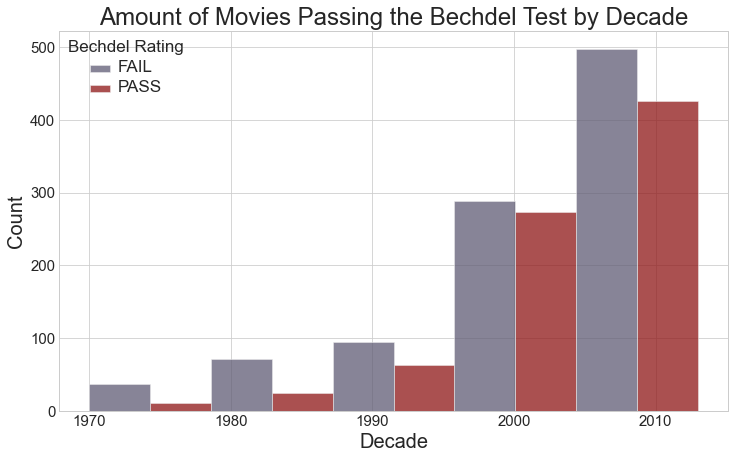

In [345]:
merge.rename(columns={'binary': 'Bechdel Rating'}, inplace=True) #change binary to BT everywhere
sns.set_palette(("#5F5B74","#8E1616"))
fig, ax = plt.subplots(figsize=(12,7))
g1=sns.histplot(data=merge, x="year", hue="Bechdel Rating", multiple="dodge", bins=5, ax=ax)
plt.title('Amount of Movies Passing the Bechdel Test by Decade', fontsize=24)
g1.set_xlabel(xlabel="Decade",fontsize=20)
g1.set_ylabel(ylabel="Count",fontsize=20)
g1.tick_params(labelsize=15)

move_legend(ax, "upper left")
plt.setp(ax.get_legend().get_texts(), fontsize='17') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='17') # for legend title

Text(0.5, 1.0, 'Ratio of Movies Passing/Failing Bechdel Test By Year')

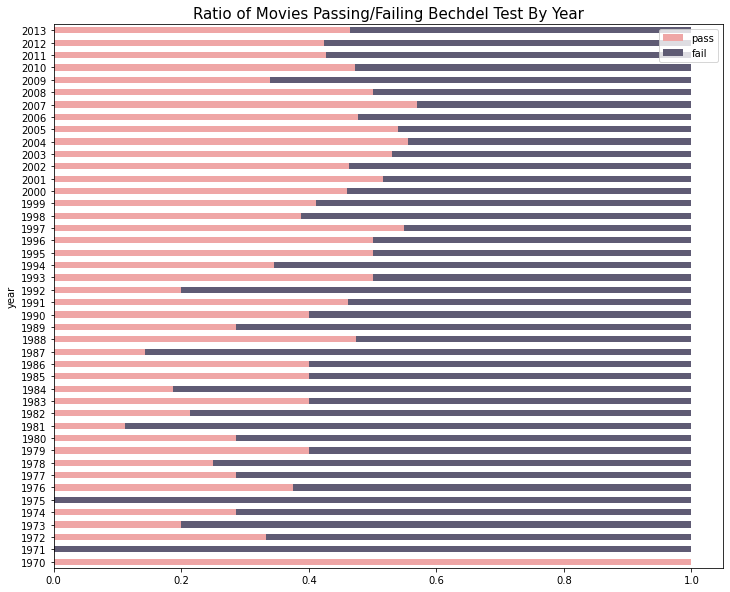

In [108]:
sns.set_palette(("#EFA6A6","#5F5B74"))
g2=norm.plot(kind="barh", stacked=True, figsize=(12, 10))
plt.title('Ratio of Movies Passing/Failing Bechdel Test By Year', fontsize=15)

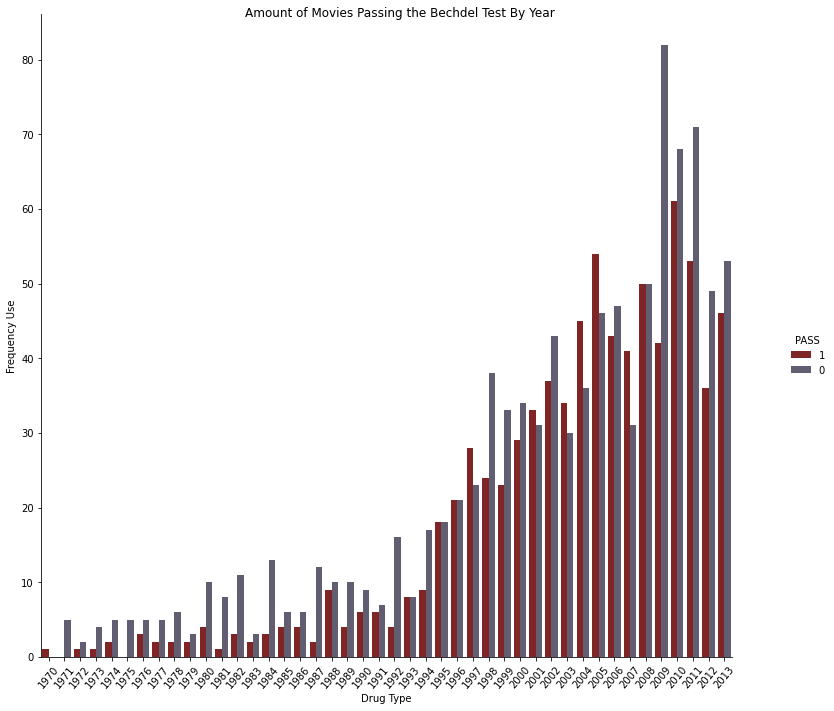

In [99]:
g = sns.catplot(x = "year",
                y = "count",
                hue = 'PASS',
                kind = 'bar',
                data = all_counts)
(g.set_axis_labels('Drug Type', 'Frequency Use')
  .set_xticklabels([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013], rotation=50)
             
)
g.fig.suptitle("Amount of Movies Passing the Bechdel Test By Year")
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

In [100]:
print(merge["Rated"].unique())
newDatasets=["dfR", "dfPG13", "dfPG", "dfNA", "dfG", "dfNR", "df17", "dfUR", "dfTVPG", "dfTV14", "dX"]
merge[merge["Rated"]=="Not Rated"].shape
merge.loc[merge["Rated"]=="Unrated","Rated"]="Not Rated"
merge.loc[merge["Rated"]=="N/A","Rated"]="Not Rated"
merge.loc[merge["Rated"]=="TV-PG","Rated"]="PG"
merge.loc[merge["Rated"]=="TV-14","Rated"]="R"

['R' 'PG-13' 'PG' 'N/A' 'G' 'Not Rated' 'NC-17' 'Unrated' 'TV-PG' 'TV-14'
 'X']


In [101]:
merge[merge["Rated"]=="TV-14"]
print(merge["Rated"].unique())


['R' 'PG-13' 'PG' 'Not Rated' 'G' 'NC-17' 'X']


[None, None]

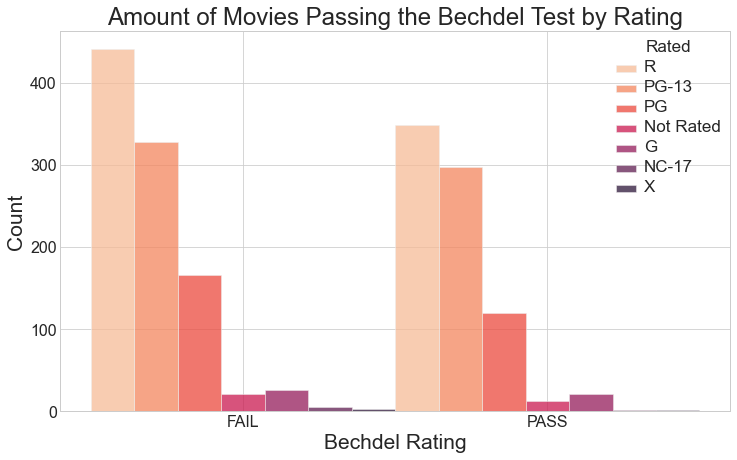

In [342]:
fig, ax = plt.subplots(figsize=(12,7))
g3=sns.histplot(data=merge, x="Bechdel Rating", palette=sns.color_palette("rocket_r", n_colors=7), hue="Rated", multiple="dodge")
plt.title('Amount of Movies Passing the Bechdel Test by Rating', fontsize=24)
g3.set_xlabel(xlabel="Bechdel Rating",fontsize=21)
g3.set_ylabel(ylabel="Count",fontsize=21)
g3.tick_params(labelsize=16)

move_legend(ax, "upper right")
plt.setp(ax.get_legend().get_texts(), fontsize='17') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='17') # for legend title

In [103]:
print(np.sort(merge["Country"].unique()))
print(np.sort(merge["Rated"].unique()))
#would be hard to sort by country since there are multiple locations for each movie
#would be more interesting to map the country which the movie was produced.

['Australia' 'Australia, USA' 'Australia, USA, Canada'
 'Australia, USA, UK' 'Belgium, USA' 'Brazil' 'Cameroon, UK' 'Canada'
 'Canada, Brazil, Japan' 'Canada, France, Japan, USA'
 'Canada, France, USA' 'Canada, India' 'Canada, Italy' 'Canada, Spain'
 'Canada, USA' 'Canada, USA, Japan' 'Canada, USA, UK' 'Chile, Spain'
 'China, Hong Kong' 'China, Italy, UK, France'
 'China, South Korea, Hong Kong' 'China, USA' 'China, USA, Canada'
 'Colombia, USA, Ecuador' 'Czech Republic, UK, USA'
 'Denmark, Germany, Sweden' 'Denmark, Sweden'
 'Denmark, Sweden, France, Germany' 'Finland, France, Germany'
 'Finland, Sweden' 'France' 'France, Australia, Germany, UK, USA'
 'France, Belgium' 'France, Belgium, Canada, UK, Latvia'
 'France, Belgium, Ireland' 'France, Belgium, USA' 'France, Canada, USA'
 'France, Germany, Austria' 'France, Germany, Italy, Canada'
 'France, Germany, UK' 'France, Germany, USA'
 'France, Hong Kong, Ireland, Spain, UK' 'France, Italy'
 'France, Liechtenstein, Switzerland, Germany'

In [191]:
print((pas["budget"]).mean())
print((fail["budget"]).mean())
#shows the difference in avg budget between movies that pass the bechdel test and 
#movies that fail the Bechdel test is ~$12000000. Pretty big difference, but I guess a lot of other factors can affect that

37840352.39325843
50284395.61919192


In [105]:
#sns.histplot(data=merge, x="budget", hue="binary",multiple="dodge")

In [106]:
print(sns.style.available)

AttributeError: module 'seaborn' has no attribute 'style'

In [352]:
pasde=pas
for i in range(2010,2020):
    pasde=pasde.replace({i : 2010})
for i in range(2000,2010):
    pasde=pasde.replace({i : 2000})    
for i in range(1990,2000):
    pasde=pasde.replace({i : 1990})
for i in range(1980,1990):
    pasde=pasde.replace({i : 1980})
for i in range(1970,1980):
    pasde=pasde.replace({i : 1970})
pasde

,year,imdbID,title,Bechdel Rating,budget,domgross,intgross,budget_2013$,domgross_2013$,intgross_2013$,...,Writer,Metascore,imdbRating,Director,Actors,Genre,Awards,Runtime,Rated,imdbVotes
1,2010,tt1343727,Dredd 3D,PASS,45000000,13414714.0,40868994.0,45658735,1.361109e+07,4.146726e+07,...,"John Wagner (characters), Carlos Ezquerra (cha...",59,7.0,Pete Travis,"Karl Urban, Rachel Wood, Andile Mngadi, Porteu...","Action, Crime, Sci-Fi",2 wins & 8 nominations.,95 min,R,"149,225"
7,2010,tt2194499,About Time,PASS,12000000,15323921.0,87324746.0,12000000,1.532392e+07,8.732475e+07,...,Richard Curtis,55,7.8,Richard Curtis,"Domhnall Gleeson, Rachel McAdams, Bill Nighy, ...","Drama, Fantasy, Romance",1 win & 6 nominations.,123 min,R,"85,871"
8,2010,tt1814621,Admission,PASS,13000000,18007317.0,18007317.0,13000000,1.800732e+07,1.800732e+07,...,"Karen Croner (screenplay), Jean Hanff Korelitz...",48,5.7,Paul Weitz,"Tina Fey, Ann Harada, Ben Levin, Dan Levy","Comedy, Drama, Romance",N/A,107 min,PG-13,"18,973"
10,2010,tt1800241,American Hustle,PASS,40000000,148430908.0,249484909.0,40000000,1.484309e+08,2.494849e+08,...,"Eric Warren Singer, David O. Russell",90,7.5,David O. Russell,"Christian Bale, Bradley Cooper, Amy Adams, Jer...","Crime, Drama",Nominated for 10 Oscars. Another 49 wins & 77 ...,138 min,R,"150,073"
11,2010,tt1322269,August: Osage County,PASS,25000000,37304874.0,50304874.0,25000000,3.730487e+07,5.030487e+07,...,"Tracy Letts (screenplay), Tracy Letts (play)",58,7.4,John Wells,"Meryl Streep, Julia Roberts, Chris Cooper, Ewa...",Drama,Nominated for 2 Oscars. Another 7 wins & 36 no...,121 min,R,"29,369"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,1970,tt0071222,Black Christmas,PASS,9000000,16235738.0,16235738.0,42513535,7.669318e+07,7.669318e+07,...,Roy Moore (screenplay),N/A,7.3,Bob Clark,"Olivia Hussey, Keir Dullea, Margot Kidder, Joh...","Horror, Mystery, Thriller",2 wins & 2 nominations.,98 min,R,"17,367"
1774,1970,tt0071562,The Godfather: Part II,PASS,13000000,57300000.0,57300000.0,61408439,2.706695e+08,2.706695e+08,...,"Francis Ford Coppola (screenplay), Mario Puzo ...",80,9.1,Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...","Crime, Drama",Won 6 Oscars. Another 11 wins & 16 nominations.,200 min,R,"540,581"
1781,1970,tt0070047,The Exorcist,PASS,12000000,204868002.0,402735134.0,62926730,1.074306e+09,2.111900e+09,...,William Peter Blatty (written for the screen b...,82,8.0,William Friedkin,"Ellen Burstyn, Max von Sydow, Lee J. Cobb, Kit...",Horror,Won 2 Oscars. Another 13 wins & 14 nominations.,122 min,R,"229,913"
1784,1970,tt0069089,Pink Flamingos,PASS,12000,413802.0,413802.0,66866,2.305762e+06,2.305762e+06,...,John Waters,N/A,6.1,John Waters,"Divine, David Lochary, Mary Vivian Pearce, Min...","Comedy, Crime, Horror",N/A,93 min,NC-17,"13,277"


In [353]:
failde=fail
for i in range(2010,2020):
    failde=failde.replace({i : 2010})
for i in range(2000,2010):
    failde=failde.replace({i : 2000})    
for i in range(1990,2000):
    failde=failde.replace({i : 1990})
for i in range(1980,1990):
    failde=failde.replace({i : 1980})
for i in range(1970,1980):
    failde=failde.replace({i : 1970})
failde

,year,imdbID,title,Bechdel Rating,budget,domgross,intgross,budget_2013$,domgross_2013$,intgross_2013$,...,Writer,Metascore,imdbRating,Director,Actors,Genre,Awards,Runtime,Rated,imdbVotes
0,2010,tt1711425,21 &amp; Over,FAIL,13000000,25682380.0,42195766.0,13000000,25682380.0,42195766.0,...,"Jon Lucas, Scott Moore",34,5.8,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",Comedy,1 win.,93 min,R,"40,030"
2,2010,tt2024544,12 Years a Slave,FAIL,20000000,53107035.0,158607035.0,20000000,53107035.0,158607035.0,...,"John Ridley (screenplay), Solomon Northup (bas...",97,8.3,Steve McQueen,"Chiwetel Ejiofor, Dwight Henry, Dickie Gravois...","Biography, Drama, History",Won 3 Oscars. Another 131 wins & 137 nominations.,134 min,R,"143,446"
3,2010,tt1272878,2 Guns,FAIL,61000000,75612460.0,132493015.0,61000000,75612460.0,132493015.0,...,"Blake Masters (screenplay), Steven Grant (base...",55,6.8,Baltasar Kormákur,"Denzel Washington, Mark Wahlberg, Paula Patton...","Action, Comedy, Crime",1 win.,109 min,R,"87,301"
4,2010,tt0453562,42,FAIL,40000000,95020213.0,95020213.0,40000000,95020213.0,95020213.0,...,Brian Helgeland,62,7.6,Brian Helgeland,"Chadwick Boseman, Harrison Ford, Nicole Behari...","Biography, Drama, Sport",3 wins & 13 nominations.,128 min,PG-13,"43,608"
5,2010,tt1335975,47 Ronin,FAIL,225000000,38362475.0,145803842.0,225000000,38362475.0,145803842.0,...,"Chris Morgan (screenplay), Hossein Amini (scre...",29,6.6,Carl Rinsch,"Keanu Reeves, Hiroyuki Sanada, Ko Shibasaki, T...","Action, Adventure, Fantasy",1 nomination.,118 min,PG-13,"25,735"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,1970,tt0067065,Escape from the Planet of the Apes,FAIL,2500000,12300000.0,12300000.0,14386286,70780525.0,70780525.0,...,"Paul Dehn, Pierre Boulle (characters creator)",N/A,6.2,Don Taylor,"Roddy McDowall, Kim Hunter, Bradford Dillman, ...","Action, Sci-Fi",N/A,98 min,G,"16,126"
1787,1970,tt0067741,Shaft,FAIL,53012938,70327868.0,107190108.0,305063707,404702718.0,616827003.0,...,"Ernest Tidyman (screenplay), John D.F. Black (...",N/A,6.6,Gordon Parks,"Richard Roundtree, Moses Gunn, Charles Cioffi,...","Action, Crime, Thriller",Won 1 Oscar. Another 4 wins & 4 nominations.,100 min,R,"10,275"
1788,1970,tt0067800,Straw Dogs,FAIL,25000000,10324441.0,11253821.0,143862856,59412143.0,64760273.0,...,"David Zelag Goodman (screenplay), Sam Peckinpa...",N/A,7.6,Sam Peckinpah,"Dustin Hoffman, Susan George, Peter Vaughan, T...",Thriller,Nominated for 1 Oscar. Another 1 win.,118 min,R,"37,726"
1789,1970,tt0067116,The French Connection,FAIL,2200000,41158757.0,41158757.0,12659931,236848653.0,236848653.0,...,"Ernest Tidyman (screenplay), Robin Moore (base...",96,7.8,William Friedkin,"Gene Hackman, Fernando Rey, Roy Scheider, Tony...","Action, Crime, Thriller",Won 5 Oscars. Another 18 wins & 8 nominations.,104 min,R,"62,153"


In [354]:
budgp=pasde.groupby("year")[["budget"]].mean()
budgp["PASS"]=1
budgp

,budget,PASS
year,,
1970,7.022286e+06,1
1980,1.837500e+07,1
1990,3.215220e+07,1
2000,3.864633e+07,1
2010,4.620527e+07,1


In [355]:
budgf=failde.groupby("year")[["budget"]].mean()
budgf["PASS"]=0
budgf

,budget,PASS
year,,
1970,1.190300e+07,0
1980,1.794188e+07,0
1990,4.200383e+07,0
2000,5.406669e+07,0
2010,6.837842e+07,0


In [356]:
budget=budgf.append(budgp)
budget['year'] = budget.index
budget=budget.reset_index(drop=True)
budget.sort_values(by="year", ascending=False)

,budget,PASS,year
4,6.837842e+07,0,2010
9,4.620527e+07,1,2010
3,5.406669e+07,0,2000
8,3.864633e+07,1,2000
2,4.200383e+07,0,1990
7,3.215220e+07,1,1990
1,1.794188e+07,0,1980
6,1.837500e+07,1,1980
0,1.190300e+07,0,1970
5,7.022286e+06,1,1970


Text(0.5, 0.98, 'Average Budget of Movies Passing the Bechdel Test by Decade')

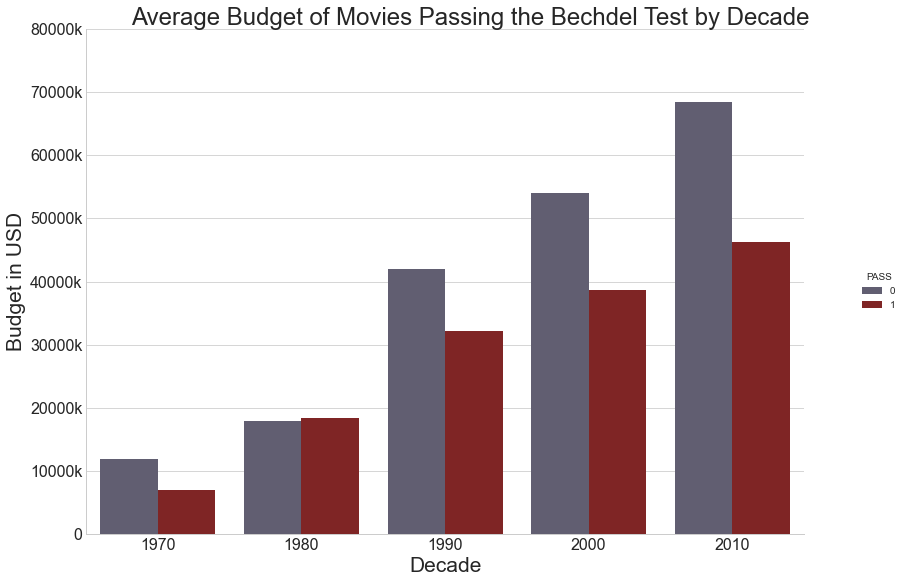

In [376]:
sns.set_palette(("#5F5B74","#8E1616"))
plt.style.use("seaborn-whitegrid")
g = sns.catplot(x = "year",
                y = "budget",
                hue = "PASS",
                kind = 'bar',
                data = budget)

g.fig.set_figwidth(12)
g.fig.set_figheight(8)
(g.set_axis_labels('Decade','Budget in USD', size=21)            
.set_yticklabels([0,"10000k","20000k","30000k","40000k","50000k","60000k","70000k","80000k"], size=16)
 .set_xticklabels(size=16)
)
g.fig.suptitle("Average Budget of Movies Passing the Bechdel Test by Decade", size=24)

In [265]:
801/(990+801)

0.4472361809045226

In [360]:
14/(14+40)

0.25925925925925924

In [370]:
budget

,budget,PASS,year
0,1.190300e+07,0,1970
1,1.794188e+07,0,1980
2,4.200383e+07,0,1990
3,5.406669e+07,0,2000
4,6.837842e+07,0,2010
5,7.022286e+06,1,1970
6,1.837500e+07,1,1980
7,3.215220e+07,1,1990
8,3.864633e+07,1,2000
9,4.620527e+07,1,2010


In [371]:
1.190300/(1.190300+.7022286)

0.6289469020441751

In [372]:
1.794188/(1.794188+1.837500)

0.4940369326880503

In [373]:
4.200383/(4.200383+3.215220)

0.5664250095373229

In [374]:
5.406669/(5.406669+3.864633)

0.5831617824551503

In [375]:
6.837842/(6.837842+4.62052)

0.5967556270259222